In this lab we follow the discussion laid out from slide 44 of Lecture 2 onwards. We begin by importing some standard libraries. We also set the random seed for consistency of the results, although this can be removed freely.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

We set the parameters for the distributions of features, noise and model, as well as the iteration count, number of experiments to average over, dimension of the linear model, number of agent, number of participating agents, and the number of local updates. The parameters in this cell are the ones we will be primarly varying to obtain numerical results in difference settings.

We also set the base model to the vector of all ones.

Finally, we set the step-size.

You are encouraged to vary these parameters and see if the numerical results conform with the analytical results in the lectures.

In [18]:
sigma_h_squared = 1
sigma_v_squared = 0.01
sigma_w_squared = 0
iterations = 1000
experiments = 10
M = 2
K = 100
L = 10
E = 10

w_base = np.ones(M)

mu = 0.1

We now implement the recursions on slide 46. In each experiment, we generate a new set of weights $w_k^o$, along with the corresponding globally optimal model $w^o$. It can be verified that, since the regressor covariances $R_h$ are common across agents, it holds that $w^o = \frac{1}{K} \sum_{k=1}^K w_k^o$.

In [19]:
# We will use this array to store the mean-squared deviation (MSD) over time.
error = np.zeros((iterations+1, experiments))

for experiment in range(experiments):
    # Sample a set of local models, and compute the corresponding global model.
    w_ok = np.random.multivariate_normal(w_base, np.square(sigma_w_squared)*np.eye(M), K).T
    w_o = np.mean(w_ok, 1)

    w = np.zeros(M)
    error[0, experiment] = np.square(np.linalg.norm(w - w_o))
    for i in range(1, iterations+1):
        # This construction computes the set of participating agents at each iteration.
        cal_L = np.random.permutation(K)
        cal_L = cal_L[range(L)]

        # Psi will store the intermediate local models at each agent.
        psi = np.zeros((M, K))
        # Update local models only for participating agents.
        for k in cal_L:
            # Initialize local models to the current global model.
            psi[:, k] = w
            for e in range(E):
                # Generate a new pair of samples h and v, from which we can find gamma.
                h = np.random.multivariate_normal(np.zeros(M), sigma_h_squared*np.eye(M)).T
                v = np.random.normal(0, sigma_v_squared)
                gamma = np.dot(h, w_ok[:, k]) + v

                psi[:, k] = psi[:, k] + np.true_divide(mu, E) * h * (gamma - np.dot(h, psi[:, k]))
        # Aggregate the updated models of participating agents.
        w = np.mean(psi[:, cal_L], axis=1)
        error[i, experiment] = np.square(np.linalg.norm(w - w_o))

Finally, we plot the different learning curves in semilogarithmic scale.

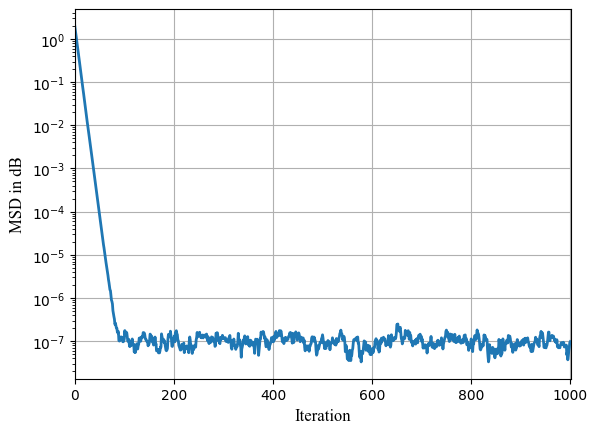

In [20]:
# Plot the result.
plt.figure()
plt.semilogy(range(iterations+1), np.mean(error, axis=1), linewidth=2)
plt.xlabel('Iteration',fontsize=12,fontname='times new roman' )
plt.ylabel('MSD in dB',fontsize= 12,fontname='times new roman' )
plt.xlim(0,iterations+1)
plt.grid()
plt.savefig('experiment.eps', format='eps')
plt.show()